In [20]:
#데이터 구성 패키지:series, dataFrame
import pandas as pd
#행렬 연산 패키지
import numpy as np

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

#scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#matplotlib 이용한 background 그래프 실행 및 결고 확인 
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

import scipy.stats 

%matplotlib inline

In [21]:
pre_review = pd.read_excel("C:/Users/taeroonie/빅데이터 최종 프로젝트/A반_3조_보험_Data Set/insu_pre_review_processing.xlsx", sheet_name='Sheet1')
pre_review.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi
0,C112346,혈액검사,재검,2014-10-09,1,70,165,60,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.140496
1,C112350,일반검진,재검,2014-11-18,1,65,175,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.671254
2,C112355,일반검진,재검,2015-03-18,1,70,165,65,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.158818
3,C112356,혈액검사,재검,2015-09-28,1,70,165,60,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.507805
4,C112358,혈액검사,거절,2015-02-24,1,70,165,70,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.491508


In [22]:
pre_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14934 entries, 0 to 14933
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        14934 non-null  object 
 1   review_cat         14934 non-null  object 
 2   judge              14934 non-null  object 
 3   review_date        14934 non-null  object 
 4   gender             14934 non-null  int64  
 5   age                14934 non-null  int64  
 6   height             14934 non-null  int64  
 7   weight             14934 non-null  int64  
 8   bust               14932 non-null  float64
 9   waist              14934 non-null  float64
 10  bp_min             14934 non-null  int64  
 11  bp_max             14934 non-null  int64  
 12  pulse_count        14934 non-null  int64  
 13  bt_chol            11779 non-null  float64
 14  bt_crea            5749 non-null   float64
 15  bt_gluc            11779 non-null  float64
 16  bt_hb              792

In [ ]:
pre_review_ilban = pre_review[pre_review['review_cat'] == '일반검진']
pre_review_ilban['judge_score'].value_counts()

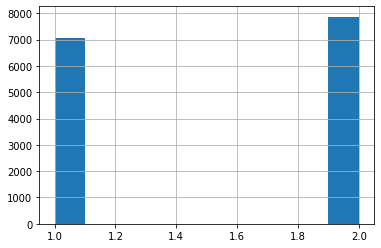

In [23]:
pre_review["gender"].hist()

In [27]:
pre_review['review_cat'].value_counts()

혈액검사    11779
일반검진     3155
Name: review_cat, dtype: int64

C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Gl

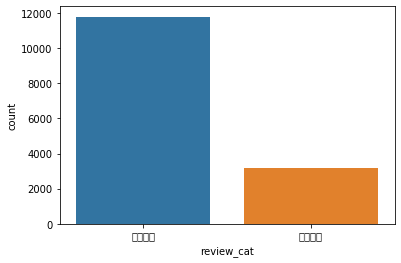

In [29]:
sns.countplot(x="review_cat", data=pre_review)

In [30]:
pre_review['review_cat'].value_counts

<bound method IndexOpsMixin.value_counts of 0        혈액검사
1        일반검진
2        일반검진
3        혈액검사
4        혈액검사
         ... 
14929    혈액검사
14930    일반검진
14931    일반검진
14932    혈액검사
14933    혈액검사
Name: review_cat, Length: 14934, dtype: object>

In [31]:
pre_review['review_cat'].value_counts(normalize=True).round(2)

혈액검사    0.79
일반검진    0.21
Name: review_cat, dtype: float64

In [32]:
pre_review['judge'].value_counts()

재검    8146
승인    3962
거절    2826
Name: judge, dtype: int64

C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Gl

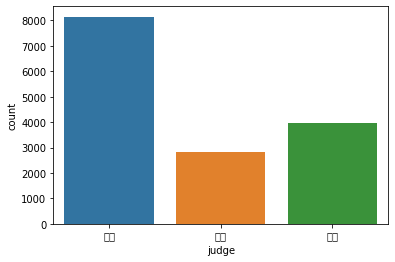

In [33]:
sns.countplot(x="judge", data=pre_review)

In [34]:
pre_review['judge'].value_counts(normalize=True).round(2)

재검    0.55
승인    0.27
거절    0.19
Name: judge, dtype: float64

In [35]:

pre_review['gender'] = pre_review['gender'].map({1:'남성', 2:'여성'})

In [36]:
pre_review['gender'].value_counts()

여성    7871
남성    7063
Name: gender, dtype: int64

C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\taeroonie\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 

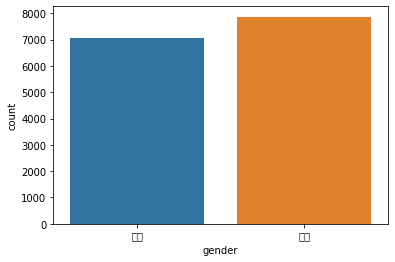

In [37]:
sns.countplot(x="gender", data=pre_review)

In [38]:
pre_review['gender'].value_counts(normalize=True).round(2)

여성    0.53
남성    0.47
Name: gender, dtype: float64